# Importing and data cleaning

In [1]:
import pandas as pd
import os
import numpy as np
import pydsm
import math
import matplotlib
import scipy
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

SAMPLING_RATE = 1e5
os.listdir("/media/ayush/DATA1/Hydrophone Recording/")

['.ipynb_checkpoints',
 '0 Degree Horizontal.csv',
 '0 Degree Vertical.csv',
 '11 Degree Horizontal.csv',
 '11 Degree Vertical.csv',
 '30_5_19.csv',
 '45 Degree Horizontal.csv',
 '45 Degree Vertical.csv',
 'actual.csv',
 'actual_read.csv',
 'Recording 1',
 'recordings']

In [2]:
D0H_df = pd.read_csv("/media/ayush/DATA1/Hydrophone Recording/actual.csv")
print("Shape of the recording CSV: " + str(D0H_df.shape))
D0H_df.head()

/home/ayush/Projects/mlpython3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Shape of the recording CSV: (3000003, 8)


,Timestamp,13-06-19 11:58:37 PM,Timestamp.1,13-06-19 11:58:37 PM.1,Timestamp.2,13-06-19 11:58:37 PM.2,Timestamp.3,13-06-19 11:58:37 PM.3
0,Interval,1E-05,Interval,1E-05,Interval,1E-05,Interval,1E-05
1,Channel name,Input 0,Channel name,Input 1,Channel name,Input 2,Channel name,Input 3
2,Unit,V,Unit,V,Unit,V,Unit,V
3,0,0.0040781250000000019,0,0.00038469800000000016,0,0.00013290499999999989,0,0.00061198700000000003
4,1E-05,0.0040781250000000019,1E-05,0.00038469800000000016,1E-05,-0.00019059200000000006,1E-05,-3.5052999999999951E-05


In [3]:
first_channel_rec = D0H_df[['Timestamp','13-06-19 11:58:37 PM']]
second_channel_rec = D0H_df[['Timestamp.1','13-06-19 11:58:37 PM.1']]
third_channel_rec = D0H_df[['Timestamp.2','13-06-19 11:58:37 PM.2']]
fourth_channel_rec = D0H_df[['Timestamp.3','13-06-19 11:58:37 PM.3']]

time_interval = float(first_channel_rec.iloc[0,1])
sampling_rate = round(1/time_interval)
print("Time interval: " + str(time_interval))
print("Sampling Rate: " + str(sampling_rate))

#Dropping the first two rows and converting to numpy
first_channel_rec = first_channel_rec.iloc[3:].to_numpy().astype(float)
second_channel_rec = second_channel_rec.iloc[3:].to_numpy().astype(float)
third_channel_rec = third_channel_rec.iloc[3:].to_numpy().astype(float)
fourth_channel_rec = fourth_channel_rec.iloc[3:].to_numpy().astype(float)
print("Shapes of individual recordings: " +  str(np.shape(first_channel_rec)))

first_channel_rec

Time interval: 1e-05
Sampling Rate: 100000
Shapes of individual recordings: (3000000, 2)


array([[0.000000e+00, 4.078125e-03],
       [1.000000e-05, 4.078125e-03],
       [2.000000e-05, 4.401651e-03],
       ...,
       [2.999997e+01, 3.754599e-03],
       [2.999998e+01, 3.431073e-03],
       [2.999999e+01, 3.431073e-03]])

# Processing the data

In [ ]:
data = first_channel_rec[:,1]

peaks = []
i=0
sum=data[0]
average=data[0]
j=0

while(i<len(data)):
        sum += abs(data[i])
        #print(sum)
        peak_i = i
        average = sum/(j+1)
        try:
            if(data[i] > 10*average):
                peak_i = i
                print(average)
                i+=50000
                peaks.append(peak_i)
                sum=data[i]
                average=data[i]
                j=0
            i+=1
            j+=1
        except:
            print("Error in index")
            break

print(peaks)
print("Number of peaks found: " + str(len(peaks)))

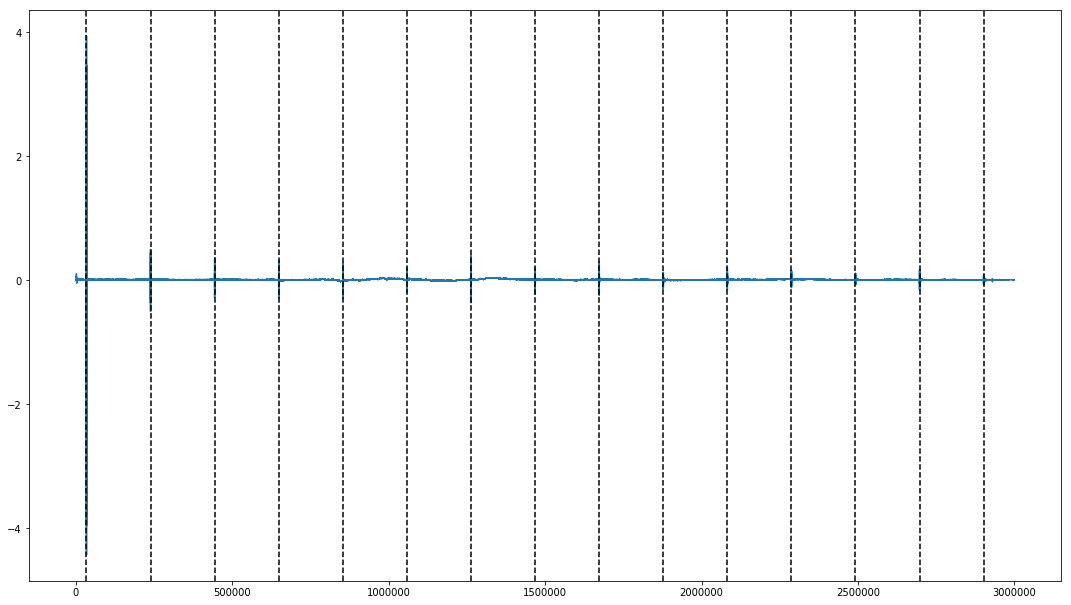

In [14]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.plot(first_channel_rec[:,1])
for index in peaks:
    plt.axvline(x=index, color='k', linestyle='--')
plt.show()

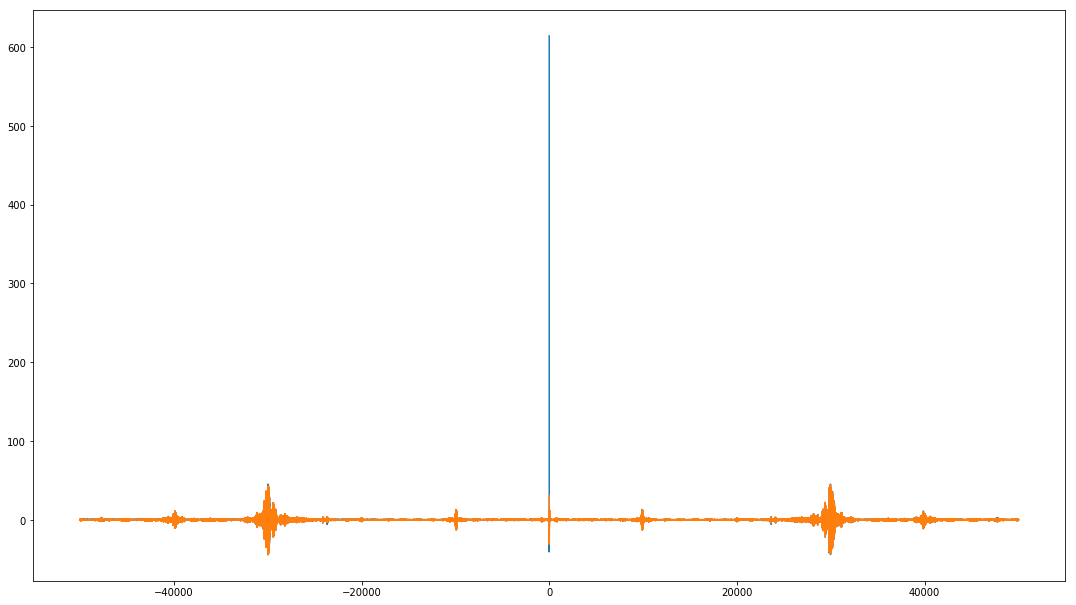

[614.17679436 +0.j         -40.19120121-30.9757855j
  -4.15352756-12.26309815j ...  -0.97427245 +2.32426199j
  -4.15352756+12.26309815j -40.19120121+30.9757855j ]
[ 0.  1.  2. ... -3. -2. -1.]
Shapes of sp: (100000,), freq:(100000,)


In [16]:
sp = np.fft.fft(first_channel_rec_cleaned[:,1])
freq = np.fft.fftfreq(first_channel_rec_cleaned[:,1].shape[-1], d=1e-5)
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.plot(freq, sp.real, freq, sp.imag)

plt.show()
print(sp)
print(freq)
print("Shapes of sp: " + str(np.shape(sp)) + ", freq:" + str(np.shape(freq)))

In [25]:
def fft_peak_plot(data, peak):
    peak_i = peak
    sample_length = 1024
    
    arr = data[peak_i:peak_i+sample_length]
    sp = np.fft.fft(arr)
    freq = np.fft.fftfreq(arr.shape[-1], d=1e-5)
    amplitude = []
    i=0
    #print("Shapes of sp: " + str(np.shape(sp)) + ", freq:" + str(np.shape(freq)))
    pinger_freq = 30e3
    data_point = int(pinger_freq/(freq[1]-freq[0])) + 1
    #plt.plot(data[peak_i:peak_i+128])
    #print("The information about " + str(pinger_freq) + " is the data_point: " + str(data_point) + " at freq: " + str(freq[data_point]))
    data_pinger_freq = sp[data_point]
    #print("The fft data at the data_point is: " + str(data_pinger_freq))
    phase_info = math.atan(sp[data_point].imag/sp[data_point].real)/math.pi*180
    #print("The phase at the values given is: " + str(phase_info))
    return phase_info, arr, sp

In [26]:
def convert_complex(rads):
    return math.cos(rads) + math.sin(rads)*1j

def svm_3d_44_coherent(theta,phi,w_freq,gamma,velocity,d,D):
    wavelength = velocity / w_freq;
    dist_d1 =  0;
    dist_d2 = d*math.cos(theta)*math.cos(phi);
    dist_d3 = D*math.sin(theta)*math.cos(phi);
    dist_d4 = D*math.sin(theta)*math.cos(phi) + d*math.cos(theta)*math.cos(phi);
    phase_d1 = 2*math.pi*dist_d1/wavelength ;
    phase_d2 = 2*math.pi*dist_d2/wavelength ;
    phase_d3 = 2*math.pi*dist_d3/wavelength ;
    phase_d4 = 2*math.pi*dist_d4/wavelength ;
    svm = np.matrix.getH(np.matrix([convert_complex(phase_d4),convert_complex(phase_d3),convert_complex(phase_d2),convert_complex(phase_d1)]))
    #print("Shape of svm: " + str(np.shape(svm)))
#     gamma_d1 = gamma * dist_d1;
#     gamma_d2 = gamma * dist_d2;
#     gamma_d3 = gamma * dist_d3;
#     gamma_d4 = gamma * dist_d4;
#     gamma_vector = np.matrix.getH(np.matrix([convert_complex(gamma_d4),convert_complex(gamma_d3),convert_complex(gamma_d2),convert_complex(gamma_d1)]))
    #print(gamma_vector)
    #print("Shape of gamma: " + str(np.shape(gamma_vector)))
#     svm_ans = (np.multiply(gamma_vector,svm))
    #print("Shape of steering_vector: " + str(np.shape(svm_ans)))
    return svm

def music(data1, data2, data3, data4):
    input_data = np.column_stack((data1, data2, data3, data4))
    hermittian_data = np.matrix.getH(input_data)
    #print("Hermittian Data: -------------------------------")
    #print(hermittian_data)
    Rxx = np.matmul(hermittian_data, input_data)/SAMPLING_RATE
    #print("\n\nCovariance matrix --------------------------")
    #print(Rxx)
    #print("Shape of Rxx: " + str(np.shape(Rxx)))
    #---- calculated the covariance matrix here ------
    
    diagonal_eigenvalues, column_eigenvectors  = scipy.linalg.eig(Rxx)
    #print("\n\nEigenvalues --------------------------")
    #print(diagonal_eigenvalues)
    #print("\n\nEigenvectors --------------------------")
    #print(column_eigenvectors)
    idx = diagonal_eigenvalues.argsort()[::-1]
    diagonal_eigenvalues = diagonal_eigenvalues[idx]# Vector of sorted eigenvalues
    column_eigenvectors = column_eigenvectors[:, idx]# Sort eigenvectors accordingly
    column_eigenvectors_noise = column_eigenvectors[:, 5:len(column_eigenvectors)]
    #print("\n\nEigenvalues --------------------------")
    #print(diagonal_eigenvalues)
    #print("\n\nEigenvectors --------------------------")
    #print(column_eigenvectors)
    
    #------sorted the column vectors according to the eigenvalues
    V = column_eigenvectors
    final_stats = []
    for azimuth in range(0,180):
        for altitude in range(-180,0):
            #print("Currently in azimuth:" + str(azimuth) + ", altitude: " + str(altitude))
            svm_2d_a = svm_3d_44_coherent(azimuth,altitude,3e4,0.02,1500,1.7,2);
            svm_2d_b = np.matrix.getH(svm_2d_a);
            #print("\n\nSteering Vectos --------------------------")
            #print(np.shape(svm_2d_b))
            num = abs(np.matmul(svm_2d_b,svm_2d_a))
            vector = np.array(V[:,1])
            #print("\n\nVector extracted --------------------------")
            #print(vector)
            #print(np.shape(vector))
            #print(np.shape(np.matmul(svm_2d_b,np.array(V[:,1]))))
            den = (abs(np.matmul(svm_2d_b,np.array(V[:,1])))**2 + (abs(np.matmul(svm_2d_b,np.array(V[:,2]))))**2)
            #print("\n\nNumerator --------------------------")
            #print(num)
            #print("\n\nDenominator --------------------------")
            #print(den)
                                                                                
            ans =  (float)(num/den); 
            final_stats.append([azimuth, altitude, ans])
            
    return final_stats

def summarise(result_from_music):
    #print(result_from_music)
    print("Shape obtained from MUSIC: " + str(np.shape(result_from_music)))
    zmax = np.max(result_from_music,axis=0)[2]
    location_zmax = (int)(np.where(result_from_music == zmax)[0])
    #print(location_zmax)
    ans_row = result_from_music[location_zmax]
    print(ans_row)
    print("Highest Value in power spectrum: " + str(zmax))
    print("Azimuth: " + str(ans_row[0]) + ", altitude: " + str(ans_row[1]))
    return ans_row[0], ans_row[1]


# p1_radians = p1*180/3.14
# p2_radians = p2*180/3.14
# p3_radians = p3*180/3.14
# p4_radians = p4*180/3.14
# complex_sign1 = sign1*(math.cos(p1_radians) + math.sin(p1_radians)*1j)     
# complex_sign2 = sign2*(math.cos(p2_radians) + math.sin(p2_radians)*1j)     
# complex_sign3 = sign3*(math.cos(p3_radians) + math.sin(p3_radians)*1j)  
# complex_sign4 = sign4*(math.cos(p4_radians) + math.sin(p4_radians)*1j)     
# result_from_music = music(complex_sign1, complex_sign2, complex_sign3, complex_sign4)
# summarise(result_from_music)

In [32]:
azimuths = []
altitudes = []
def do_everything(peak):
    print("The peak we are working about now: " + str(peak))
    p1, sign1, sp1 = fft_peak_plot(first_channel_rec[:,1], peak)
    p2, sign2, sp2 = fft_peak_plot(second_channel_rec[:,1], peak)
    p3, sign3, sp3 = fft_peak_plot(third_channel_rec[:,1], peak)
    p4, sign4, sp4 = fft_peak_plot(fourth_channel_rec[:,1], peak)
    complex_sign1 = scipy.signal.hilbert(sign1)
    complex_sign2 = scipy.signal.hilbert(sign2)
    complex_sign3 = scipy.signal.hilbert(sign3)
    complex_sign4 = scipy.signal.hilbert(sign4)
    result_from_music = music(complex_sign1, complex_sign2, complex_sign3, complex_sign4)
    azimuth, altitude = summarise(result_from_music)
    azimuths.append(azimuth)
    altitudes.append(altitude)
       
for peak in peaks:
    do_everything(peak)
    print("----------------------------------------------------------------------------")

The peak we are working about now: 33835
Shape obtained from MUSIC: (32400, 3)
[17, -48, 7.474438897646007]
Highest Value in power spectrum: 7.474438897646007
Azimuth: 17, altitude: -48
----------------------------------------------------------------------------
The peak we are working about now: 238674
Shape obtained from MUSIC: (32400, 3)
[168, -180, 10.840155521603544]
Highest Value in power spectrum: 10.840155521603544
Azimuth: 168, altitude: -180
----------------------------------------------------------------------------
The peak we are working about now: 443516
Shape obtained from MUSIC: (32400, 3)
[159, -93, 3.9347021114447025]
Highest Value in power spectrum: 3.9347021114447025
Azimuth: 159, altitude: -93
----------------------------------------------------------------------------
The peak we are working about now: 648365
Shape obtained from MUSIC: (32400, 3)
[147, -52, 40.144326705250386]
Highest Value in power spectrum: 40.144326705250386
Azimuth: 147, altitude: -52
--------

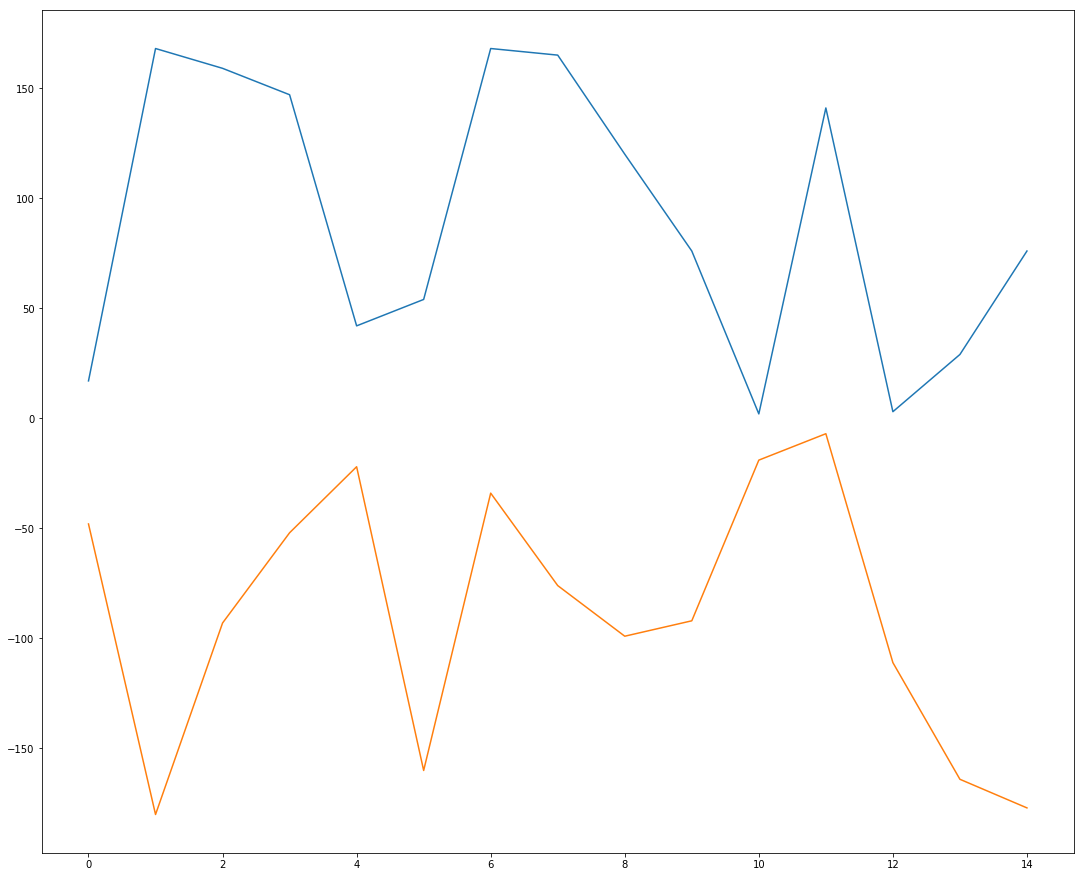

In [33]:
fig = plt.figure()
fig.set_size_inches(18.5, 15.5)
plt.plot(azimuths)
plt.plot(altitudes)
plt.show()

# Deprecated code (just for Reference)

In [ ]:
heading = math.atan((first_phase - third_phase)/(second_phase - third_phase))*180/math.pi
print("The heading calculated is: " + str(heading))

heading = math.atan((first_phase - second_phase)/(third_phase - second_phase))*180/math.pi
print("The heading calculated is: " + str(heading))

heading = math.atan((first_phase - third_phase)/(first_phase - second_phase))*180/math.pi
print("The heading calculated is: " + str(heading))

In [ ]:
def cross_correlation_using_fft(x, y):
    f1 = np.fft.fft(x)
    
    # flip the signal of y
    f2 = np.fft.fft(np.flipud(y))
    cc = np.real(np.fft.ifft(f1 * f2))

    return np.fft.fftshift(cc)
 
# shift &lt; 0 means that y starts 'shift' time steps before x 
# shift &gt; 0 means that y starts 'shift' time steps after x
def compute_shift(x, y):
    # we make sure the length of the two signals are the same
    assert len(x) == len(y)
    c = cross_correlation_using_fft(x, y)
    assert len(c) == len(x)
    zero_index = int(len(x) / 2) - 1
    shift = zero_index - np.argmax(c)
    return shift

fig = plt.figure()
fig.set_size_inches(18.5, 15.5)
plt.plot(first_channel_rec[24000:30000,:])
plt.plot(second_channel_rec[24000:30000,:])
plt.plot(third_channel_rec[24000:30000,:])
plt.plot(fourth_channel_rec[24000:30000,:])

compute_shift(first_channel_rec[24000:30000,:], second_channel_rec[24000:30000,:])

In [17]:
def correlate(data1, data2):
    np.pad(sign1, (0, len(data1)), 'constant')
    np.pad(sign2, (0, len(data2)), 'constant')

    correlation = np.fft.ifft(np.fft.fft(data1) * np.fft.fft(data2))
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    t=np.linspace(0,(len(correlation)),len(correlation))
    plt.subplot(3,1,3)
    plt.plot(t,abs(correlation))
    plt.xlabel("Time")
    plt.ylabel("Correlation")
    plt.show()
    #plt.plot(correlation.real)
    #plt.plot(correlation.imag)

    time_shift = np.argmax(abs(correlation))
    print(time_shift)
    plt.show()

In [ ]:
pinger_freq = 20e3

def give_phase_in_degrees(data, i, j):
    data_cleaned = data[i:j,:]
    np.shape(data_cleaned)
    sp = np.fft.fft(data_cleaned[:,1])
    freq = np.fft.fftfreq(data_cleaned[:,1].shape[-1], d=1e-5)
    data_point = int(pinger_freq/(10e5/(j-i+1)))
    data_pinger_freq = freq[data_point]
    phase_info = math.atan(sp[data_point].imag/sp[data_point].real)/math.pi*180
    print("Array size: {}, phase_info: {}, data_point: {}".format(j-i, phase_info, data_point))
    return phase_info, sp, freq

first_phase, first_sp, first_freq = give_phase_in_degrees(first_channel_rec, 24000, 30000)
second_phase, second_sp, second_freq = give_phase_in_degrees(second_channel_rec, 24000, 30000)
third_phase, third_sp, third_freq = give_phase_in_degrees(third_channel_rec, 24000, 30000)

print("Shape of fft array: {}".format(np.shape(first_sp)))

fig = plt.figure()
fig.set_size_inches(18.5, 15.5)
#plt.plot(first_freq)
plt.plot(first_sp.real)
plt.plot(first_sp.imag)
#plt.plot(first_freq, first_sp.real)
#plt.plot(first_freq, first_sp.imag)
plt.plot((first_sp.real**2 + first_sp.imag**2)//2)

fig = plt.figure()
fig.set_size_inches(18.5, 15.5)
plt.plot(second_sp)
plt.plot(third_sp)

In [ ]:
pinger_freq = 20e3

def give_phase_in_degrees(data, i, j):
    data_cleaned = data[i:j,:]
    np.shape(data_cleaned)
    sp = np.fft.fft(data_cleaned[:,1])
    freq = np.fft.fftfreq(data_cleaned[:,1].shape[-1], d=1e-5)
    data_point = int(pinger_freq/(10e5/(j-i+1)))
    data_pinger_freq = freq[data_point]
    phase_info = math.atan(sp[data_point].imag/sp[data_point].real)/math.pi*180
    return phase_info, sp

first_phase, first_sp = give_phase_in_degrees(first_channel_rec, 400000, 600000)
second_phase, second_sp = give_phase_in_degrees(second_channel_rec, 400000, 600000)
third_phase, third_sp = give_phase_in_degrees(third_channel_rec, 400000, 600000)

fig = plt.figure()
fig.set_size_inches(18.5, 15.5)
plt.plot(first_sp)
plt.plot(second_sp)
plt.plot(third_sp)

In [4]:
def plot_graph(data):
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    plt.plot(data[:,0], data[:,1])
    #plt.plot(data[24000:30000,0], data[24000:30000,1])

In [12]:
def fftplot(data):
    i = 0
    sum = data[i]
    average = data[i]
    peak_i = 0
    while(i<len(data)):
        sum += abs(data[i])
        #print(sum)
        average = sum/(i+1)
        if(data[i] > 5*average):
            peak_i = i
            print(average)
            break
        i+=1
    print(peak_i)

    sample_length = 1024

    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    plt.plot(data[peak_i:peak_i+sample_length])
    #plt.plot(data[peak_i:])
    plt.show()

    arr = data[peak_i:peak_i+sample_length]
    sp = np.fft.fft(arr)
    freq = np.fft.fftfreq(arr.shape[-1], d=1e-5)
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    plt.plot(freq, sp.real, freq, sp.imag)

    amplitude = []
    i=0
    while(i<sample_length):
        amplitude.append((sp[i].imag**2+sp[i].real**2)//2)
        i+=1
        
    plt.show()
    #print(sp)
    #print(freq)
    print(amplitude)
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    plt.plot(amplitude)
    plt.show()
    print("Shapes of sp: " + str(np.shape(sp)) + ", freq:" + str(np.shape(freq)))

    pinger_freq = 30e3
    data_point = int(pinger_freq/(freq[1]-freq[0])) + 1
    #plt.plot(data[peak_i:peak_i+128])
    print("The information about " + str(pinger_freq) + " is the data_point: " + str(data_point) + " at freq: " + str(freq[data_point]))
    data_pinger_freq = sp[data_point]
    print("The fft data at the data_point is: " + str(data_pinger_freq))
    phase_info = math.atan(sp[data_point].imag/sp[data_point].real)/math.pi*180
    print("The phase at the values given is: " + str(phase_info))
    
    return phase_info, arr, sp

0.00790818231188692
0.005413108528482607
0.003751516943996714
0.004396210516333828
0.0051878382123520935
0.014513047303401512
0.0059013740281151136
0.017020758815087213
0.004530727581327185
0.0031114128545354372
0.0030325664028488064
0.00732223666606358
0.0051243645750689674
0.0038183360021441836
0.00255898451347823
[33835, 238674, 443516, 648365, 853220, 1058110, 1262930, 1467895, 1672657, 1877498, 2082359, 2287232, 2492081, 2696930, 2901775]
Number of peaks found: 15
